We are going to create a model to predict house's value in Melbourne. In this case, value is the price of the property, and we also would like to know what factors create value in a house.

Data Source: https://www.kaggle.com/anthonypino/melbourne-housing-market#Melbourne_housing_FULL.csv

## Data Preprocessing

In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pylab
%matplotlib inline

In [420]:
def normalize(data):
    x = (data-data.min())/(data.max()-data.min())
    return x

def transform(data):
    x,lam = stats.boxcox(data)
    return x

def visual(df,plot_type):
    plt.rcParams["figure.figsize"] = (23,13)
    fig,ax = plt.subplots(nrows=6,ncols=4)
    i = 0
    j = 0
    
    if plot_type == "hist":
        for col in df.columns:
            if col == "Price":
                ax[i,j].hist(df[col],alpha=0.5,label=col,color="orange")
                ax[i,j].set_title(col + " Distribution")
            else:
                ax[i,j].hist(df[col],alpha=0.5,label=col)
                ax[i,j].set_title(col + " Distribution")
            if j == 3:
                i += 1
                j = 0
            else:
                j += 1
    if plot_type == "box":
        for col in df.columns:
            ax[i,j].boxplot(df[col])
            ax[i,j].set_title(col)
            if j == 3:
                i += 1
                j = 0
            else:
                j += 1
    if plot_type == "qq":
        norm = np.random.normal(0, 1, df.shape[0])
        norm.sort()
        for col in df.columns:
            sorted_col = list(df[col])
            sorted_col.sort()
            if col == "Price":
                ax[i,j].plot(norm,sorted_col,color="orange")
                ax[i,j].set_title(col + " Distribution")
            else:
                ax[i,j].plot(norm,sorted_col)
                ax[i,j].set_title(col + " Distribution")
            
            z = np.polyfit(norm,df[col], 1)
            p = np.poly1d(z)
            
            # trend line 
            # ax[i,j].plot(norm,p(norm),"k--",linewidth=2)
    if plot_type == "line":
        for col in df.columns:
            if col != "Price":
                sorted_ind = list(df["Price"])
                sorted_dep = list(df[col])
                sorted_ind.sort()
                sorted_dep.sort()
                ax[i,j].scatter(sorted_ind,sorted_dep)
                ax[i,j].set_title(col + " vs. Price")
            
            if j == 3:
                i += 1
                j = 0
            else:
                j += 1

    fig.tight_layout()
    plt.show()

In [413]:
house_data.columns != "Price"

array([ True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [366]:
data = pd.read_csv("Melbourne_housing_FULL.csv")
data.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0


In [367]:
data.shape

(34857, 21)

In [368]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [369]:
data["Date"] = pd.to_datetime(data["Date"])

In [370]:
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day

In [371]:
data.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Price                   float64
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                float64
Bedroom2                float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt               float64
CouncilArea              object
Lattitude               float64
Longtitude              float64
Regionname               object
Propertycount           float64
Year                      int64
Month                     int64
Day                       int64
dtype: object

In [372]:
cate_col = data.loc[:,data.dtypes == np.object]

In [373]:
for col in cate_col:
    data[col + "_updated"] = pd.factorize(data[col])[0]

In [374]:
data.dtypes

Suburb                         object
Address                        object
Rooms                           int64
Type                           object
Price                         float64
Method                         object
SellerG                        object
Date                   datetime64[ns]
Distance                      float64
Postcode                      float64
Bedroom2                      float64
Bathroom                      float64
Car                           float64
Landsize                      float64
BuildingArea                  float64
YearBuilt                     float64
CouncilArea                    object
Lattitude                     float64
Longtitude                    float64
Regionname                     object
Propertycount                 float64
Year                            int64
Month                           int64
Day                             int64
Suburb_updated                  int64
Address_updated                 int64
Type_updated

In [375]:
house_data = data.loc[:,((data.dtypes != np.object) & (data.columns != "Date"))]

In [376]:
house_data.dtypes

Rooms                    int64
Price                  float64
Distance               float64
Postcode               float64
Bedroom2               float64
Bathroom               float64
Car                    float64
Landsize               float64
BuildingArea           float64
YearBuilt              float64
Lattitude              float64
Longtitude             float64
Propertycount          float64
Year                     int64
Month                    int64
Day                      int64
Suburb_updated           int64
Address_updated          int64
Type_updated             int64
Method_updated           int64
SellerG_updated          int64
CouncilArea_updated      int64
Regionname_updated       int64
dtype: object

In [377]:
# select K Best, first need to check & replace NaN values
house_data.isnull().sum()

Rooms                      0
Price                   7610
Distance                   1
Postcode                   1
Bedroom2                8217
Bathroom                8226
Car                     8728
Landsize               11810
BuildingArea           21115
YearBuilt              19306
Lattitude               7976
Longtitude              7976
Propertycount              3
Year                       0
Month                      0
Day                        0
Suburb_updated             0
Address_updated            0
Type_updated               0
Method_updated             0
SellerG_updated            0
CouncilArea_updated        0
Regionname_updated         0
dtype: int64

In [378]:
missing_val_col = house_data.columns[house_data.isna().any()].tolist()

for col in missing_val_col:
    house_data[col] = house_data[col].fillna(house_data[col].mean())

/home/glenn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [379]:
house_data.isnull().sum()

Rooms                  0
Price                  0
Distance               0
Postcode               0
Bedroom2               0
Bathroom               0
Car                    0
Landsize               0
BuildingArea           0
YearBuilt              0
Lattitude              0
Longtitude             0
Propertycount          0
Year                   0
Month                  0
Day                    0
Suburb_updated         0
Address_updated        0
Type_updated           0
Method_updated         0
SellerG_updated        0
CouncilArea_updated    0
Regionname_updated     0
dtype: int64

In [380]:
house_data.shape

(34857, 23)

## Visualizing Data Distribution and Outliers

In [381]:
# apply normalization to data to get more accurate visuals
house_data = house_data.apply(normalize)

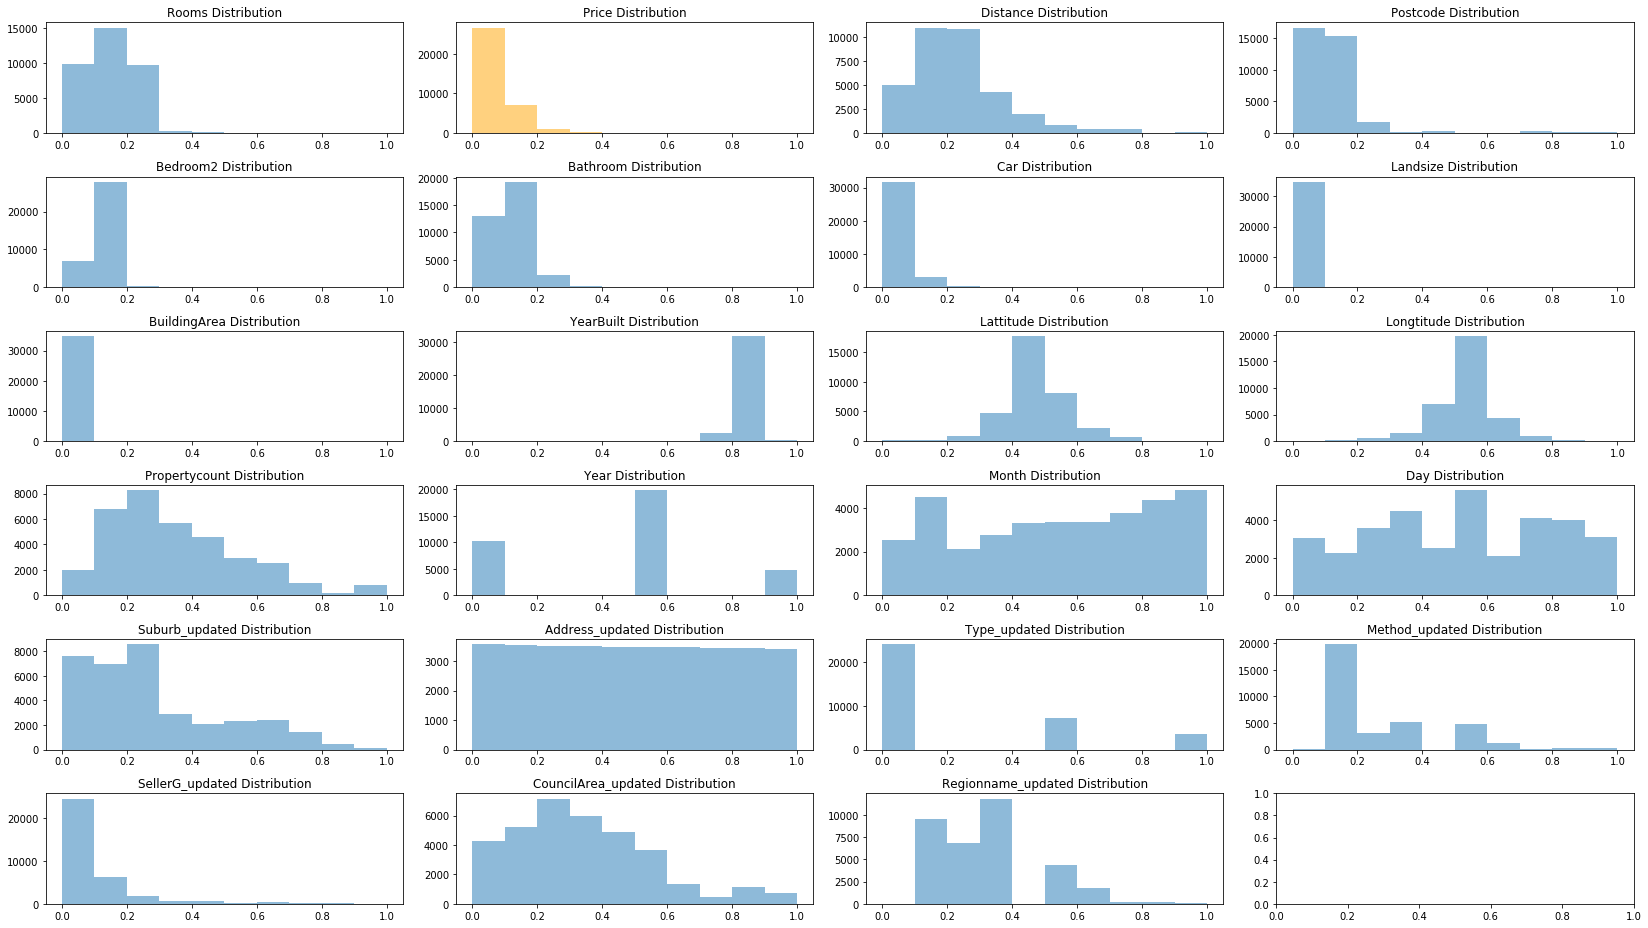

In [382]:
visual(house_data,"hist")

Most of the distributions (besides latitude and longitude) appear to be slightly skewed. May need to normalize and transform the data to better fit our models.

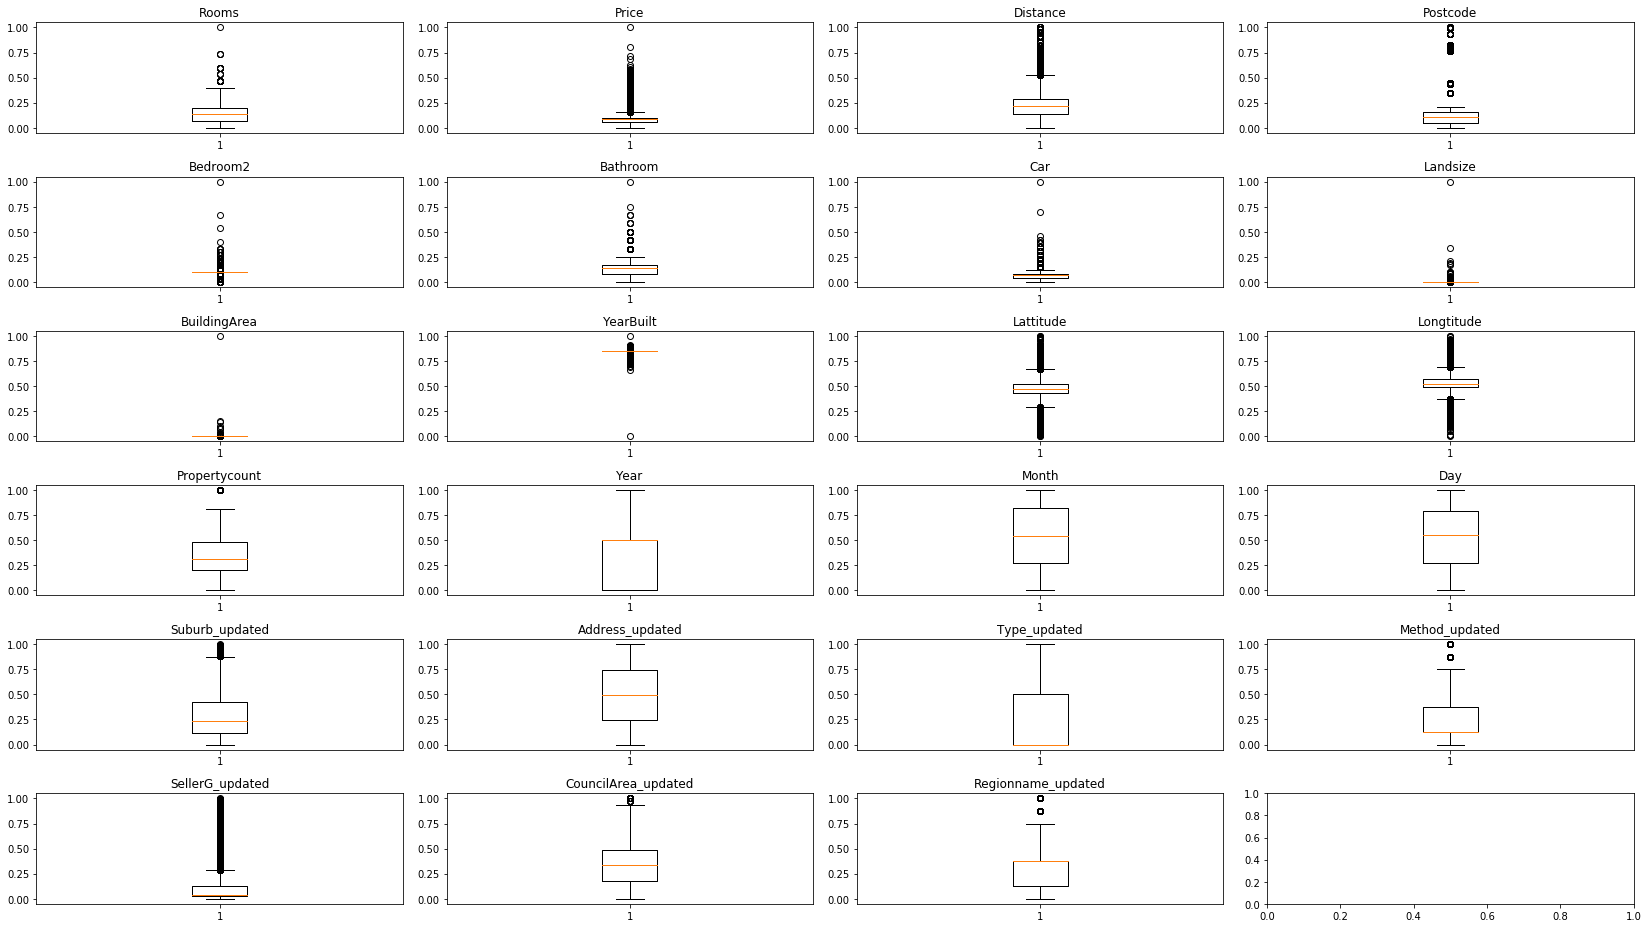

In [383]:
## Check for Outliers
visual(house_data,"box")

Appear to be some outliers in our dataset. We will most likely need to remove them to get a more accurate model.

In [384]:
house_data.shape

(34857, 23)

In [385]:
z = np.abs(stats.zscore(house_data))

In [386]:
house_data = house_data[(z<3).all(axis=1)]

In [387]:
house_data.shape

(29165, 23)

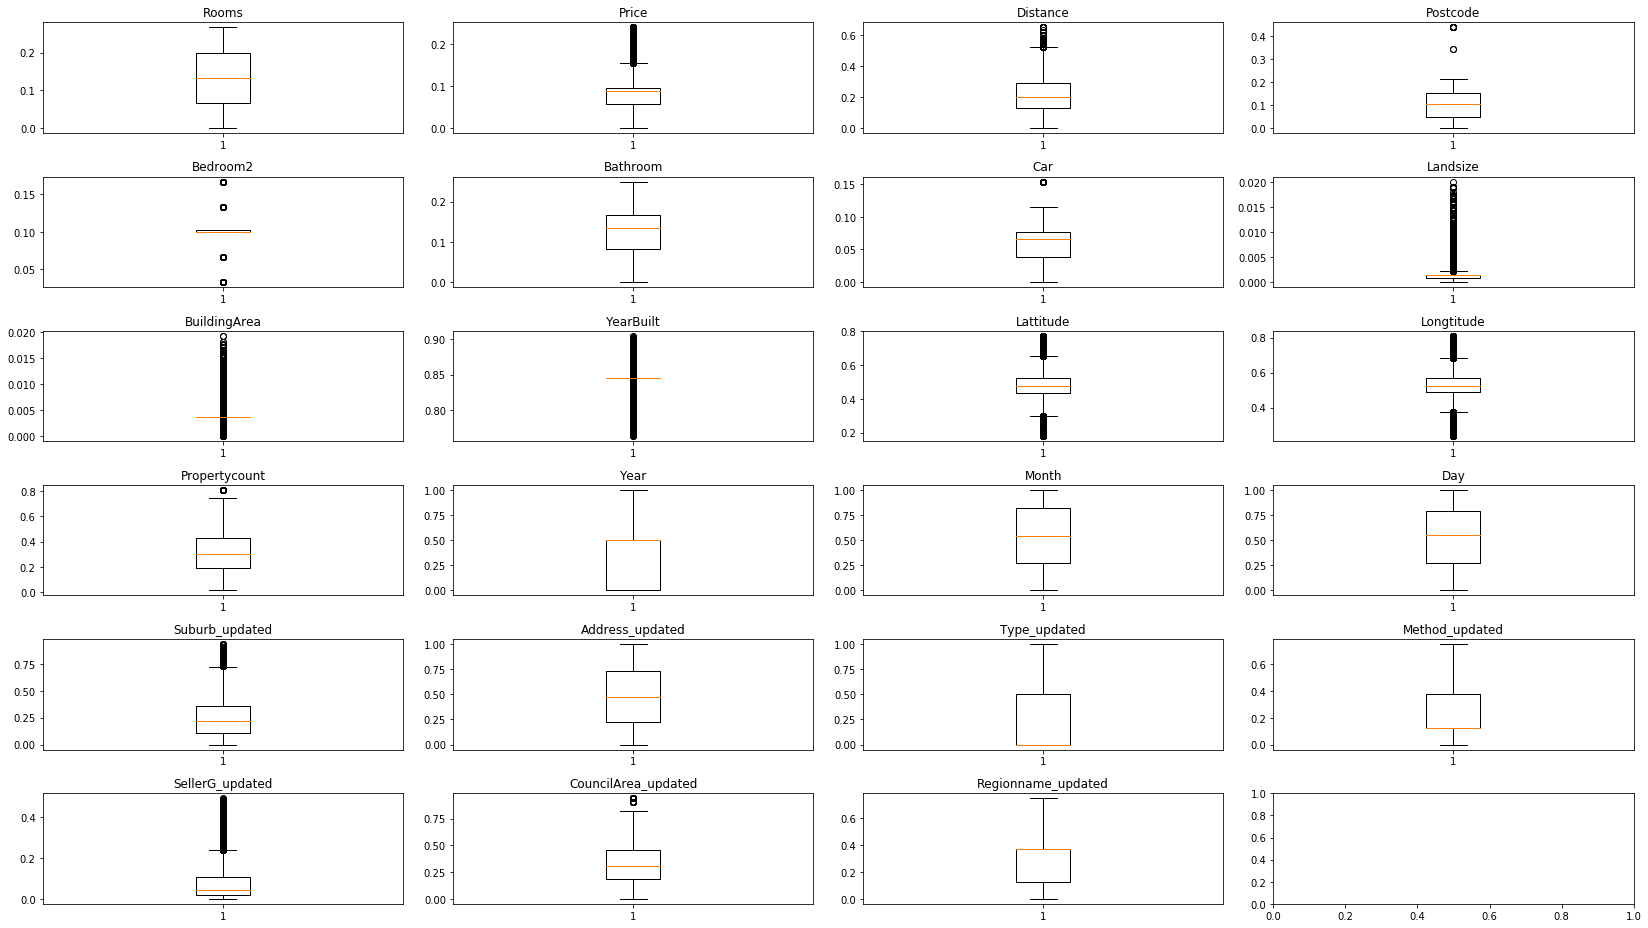

In [388]:
visual(house_data,"box")

Appears that there are still some outliers present in the data, but they are within two z-scores so they are not too significant and our model should still perform adequately.

In [389]:
# replace all 0 with small digit (0.00001)
house_data = house_data.replace(0,0.00001)

In [390]:
# transform non_categorical, non normally distributed data
non_norm_cols = house_data.loc[:,((house_data.columns != "Longtitude")& (house_data.columns != "Lattitude"))]
for col in non_norm_cols:
    house_data[col] = transform(house_data[col])

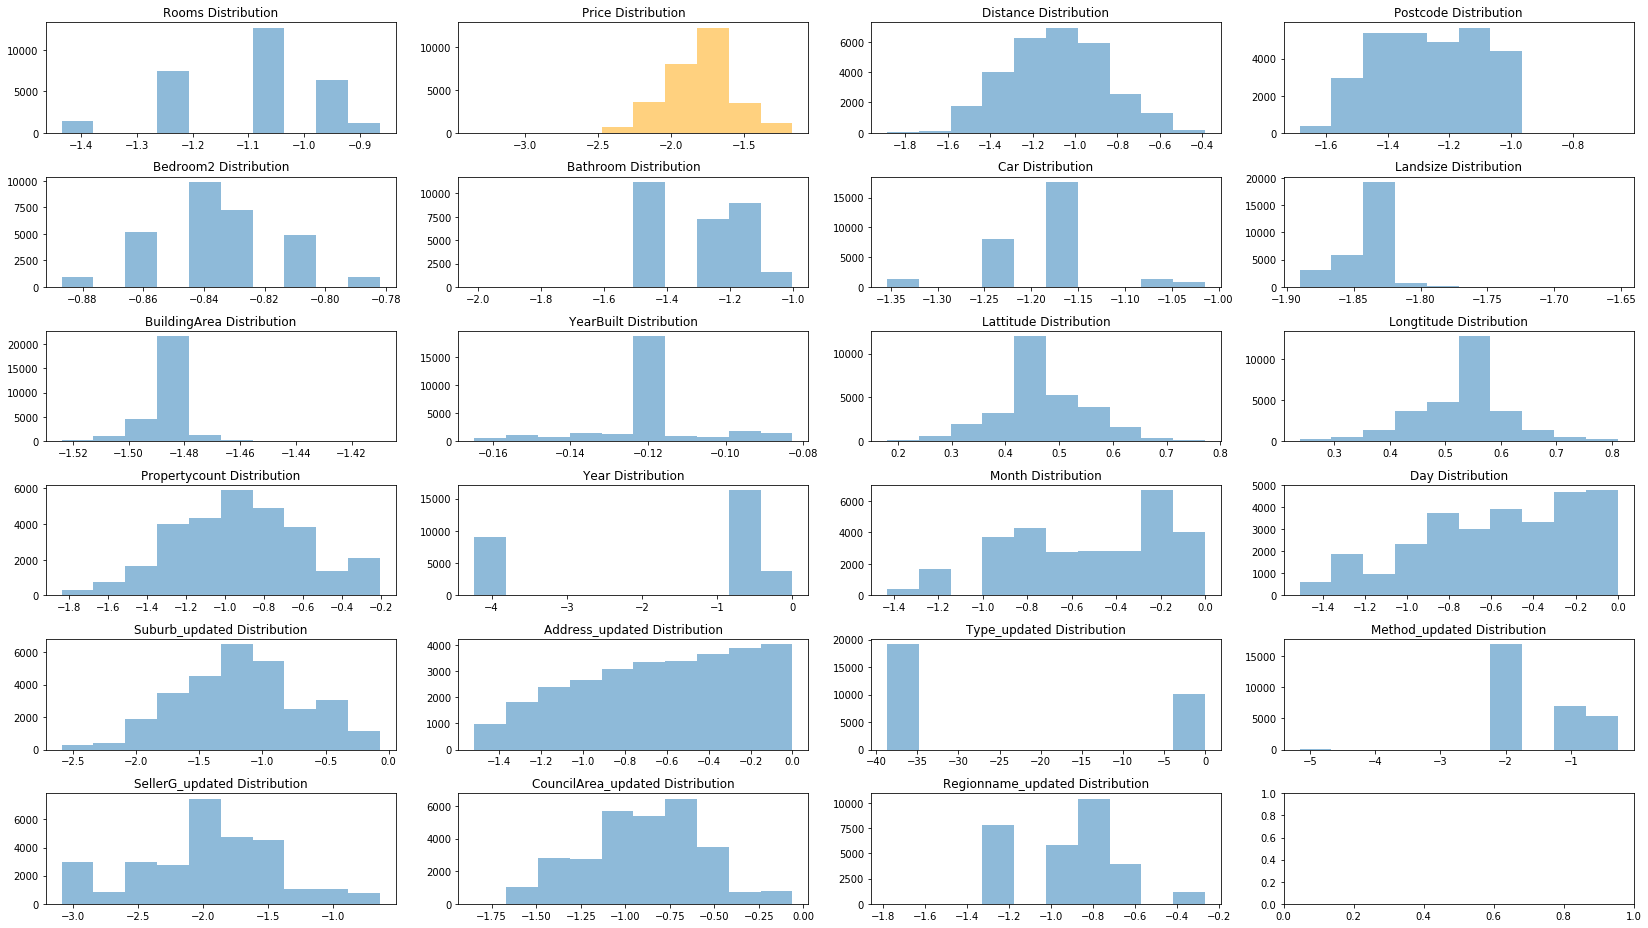

In [391]:
visual(house_data,"hist")

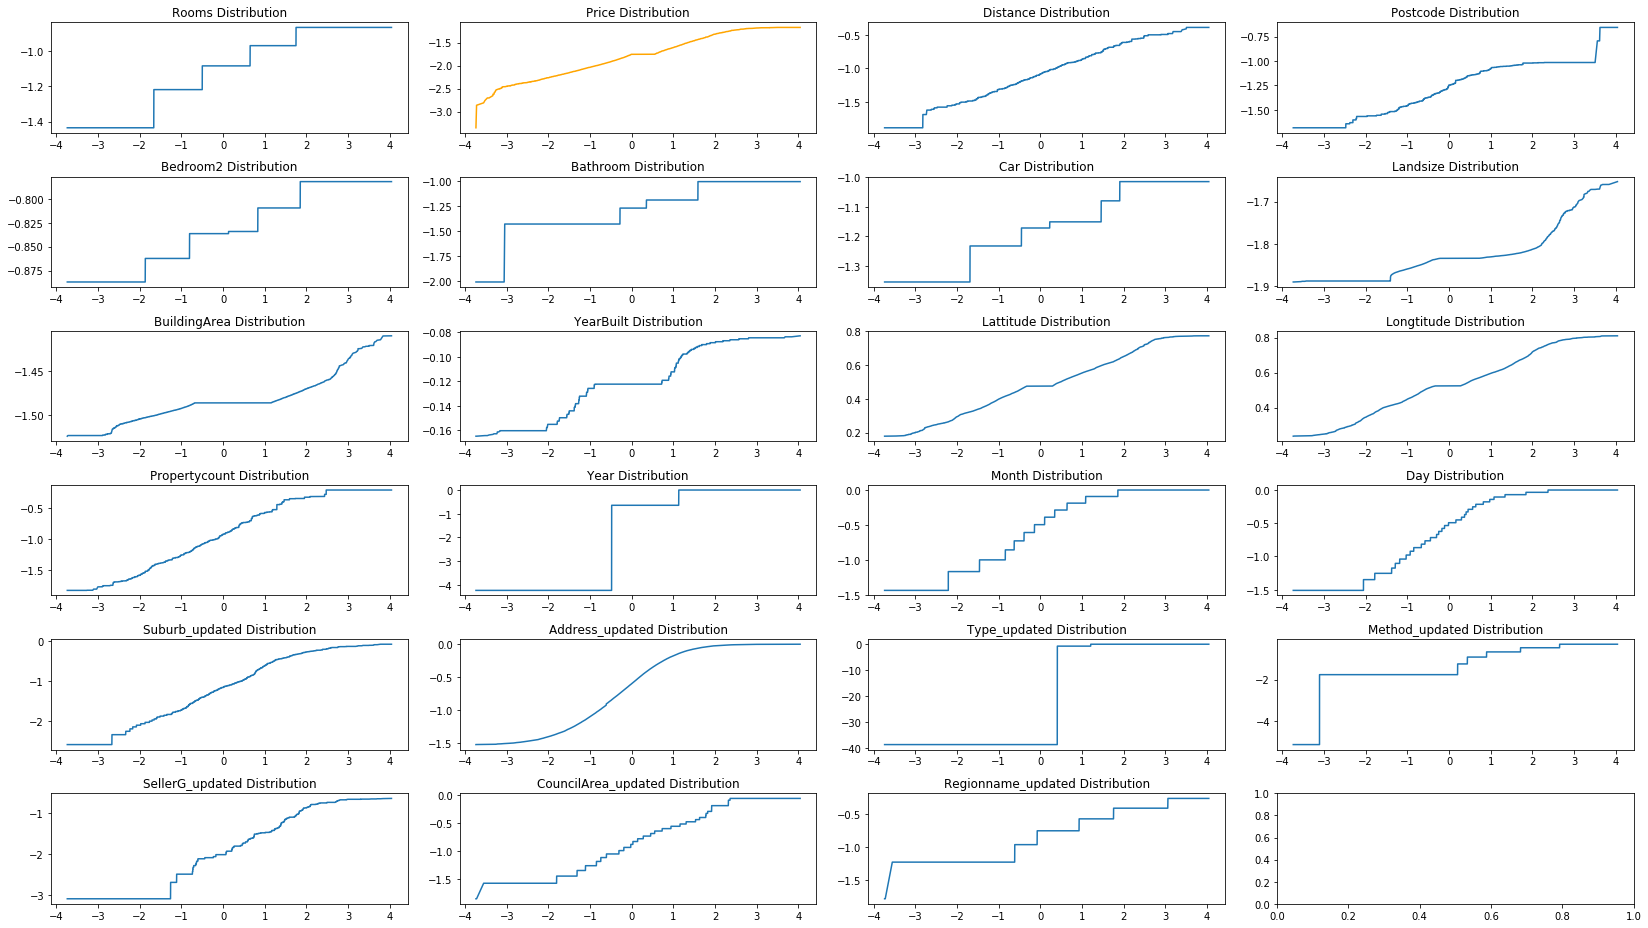

In [405]:
visual(house_data,"qq")

Not exactly perfect normal distributions for some of the independent variables, but much better improvement than previous. The plots with a "staircase" distribution indicates columns containing discrete values. 

## Determine if there's a linear relationship between independent and dependent variables

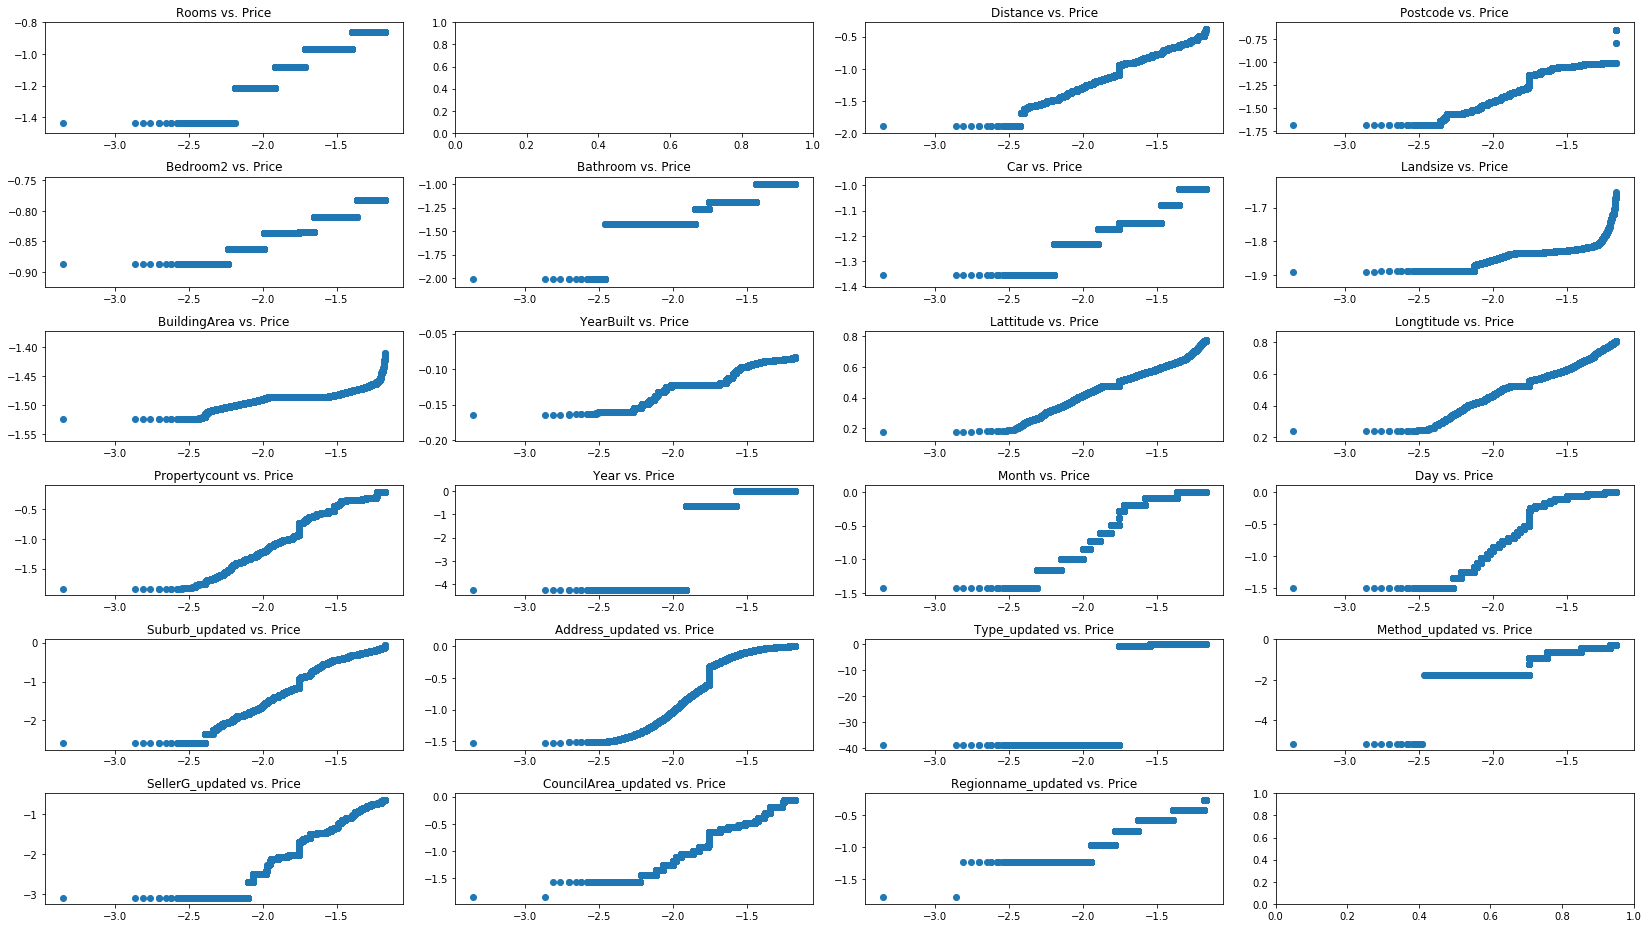

In [421]:
visual(house_data,"line")

There does not appear to be a strong linear relationship between the dependent variable and the independent variables. 

## Taking samples

Our data set is kinda big (about 30,000 data values) which could pose an efficiency issue later on when we decide to use models like Support Vector Machines, Random Forest or XGBoost. Lets see if we can create a viable sample that best reflects our population (dataset). 

In [407]:
import math

# supported confidence levels: 50%, 68%, 90%, 95%, and 99%
confidence_lvl_constant = [50,.67],[68,.99],[90,1.64],[95,1.96],[99,2.57]

# calculate the sample size
def sample_size(population_size,confidence_level,confidence_interval):
    Z = 0.0
    p = 0.5
    e = confidence_interval/100.0
    N = population_size
    n_0 = 0.0
    n = 0.0
    
    # Loop through supported confidence levels and find the num std
    # Deviations for that confidence interval
    for i in confidence_lvl_constant:
        if i[0] == confidence_level:
            Z = i[1]
    
    if Z == 0.0:
        return -1
    
    # calc sample size
    n_0 = ((Z**2)*p*(1-p))/(e**2)
    
    # adjust sample size for finite population
    n = n_0 / (1 + ((n_0 - 1)/float(N)))
    
    return int(math.ceil(n)) # the sample size

def main():
    sample_sz = 0
    population_sz = house_data.shape[0]
    confidence_level = 95.0
    confidence_interval = 2.0
    
    sample_sz = sample_size(population_sz,confidence_level,confidence_interval)
    
    print("Sample size: ",sample_sz)

if __name__ == "__main__":
    main()

Sample size:  2219


We used an equation to find the necessary sample size for our dataset:

##### Necessary Sample Size = (Z-score)^2 x StdDev x (1 - StdDev) / (margin of error)

So we need at least 2,219 data values to get a representative sample of our entire dataset (population). 

In [408]:
house_sample = house_data.sample(n = 2219,random_state = 42)

In [410]:
house_sample.shape

(2219, 23)

In [412]:
house_sample.head(3)

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Year,Month,Day,Suburb_updated,Address_updated,Type_updated,Method_updated,SellerG_updated,CouncilArea_updated,Regionname_updated
17784,-1.082943,-2.175321,-1.045499,-1.518985,-0.836362,-1.429026,-1.150552,-1.853108,-1.495537,-0.119107,...,-0.643551,-0.387619,-0.978231,-1.021202,-0.538336,-38.69614,-1.760745,-1.114708,-0.557508,-0.963888
10924,-1.218081,-1.883779,-1.208731,-1.556896,-0.862290,-1.429026,-1.079413,-1.837179,-1.486152,-0.122260,...,-4.230427,-0.854133,-0.534214,-0.947629,-0.805939,-38.69614,-1.760745,-1.633271,-0.828662,-0.963888
27389,-1.082943,-1.755266,-0.793283,-1.170078,-0.836362,-1.187587,-1.232200,-1.835103,-1.486152,-0.122260,...,-0.643551,-0.092208,-0.764051,-0.315788,-0.219958,-38.69614,-1.239418,-1.477078,-0.401055,-0.574387


Next possible steps: compare population and sample to confirm sample is representative sample of population.